## Step 1: Import libraries and create alias for Pandas, Numpy and Matplotlib

In [9]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Import the Social_Media_Adv Dataset

In [58]:
df = pd.read_csv("/home/pict/31442_DSBDAL/social_network_ads.csv")

## Step 3: Initialize the data frame

In [59]:
df.head(15)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [60]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Step 4: Perform Data Preprocessing

**A. Check for Null Value**

In [62]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**B. Convert Categorical to Numerical Values if applicable**

In [63]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


**C. Correlation Matrix to select the most promising features**

<Axes: >

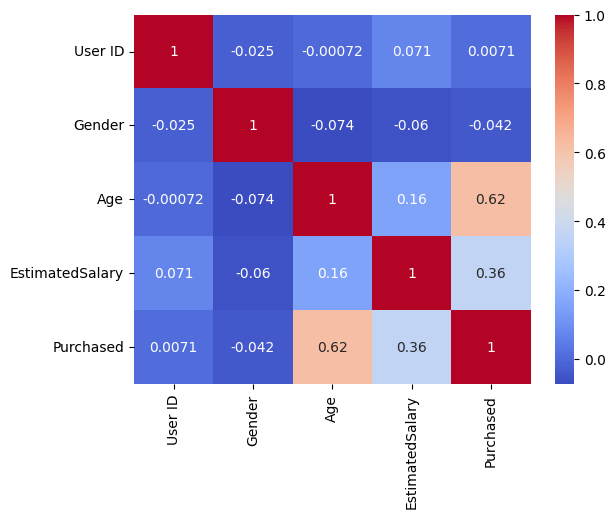

In [64]:
df.corr()   #correlation
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

**D. Divide the dataset into Independent(X) and Dependent(Y) variables.**

In [65]:
#df.drop('User ID',axis=1,inplace=True)
X = df.drop('Purchased',axis=1)
y = df['Purchased']

**E. Split the dataset into training and testing datasets**

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 42)

**F. Scale the Features if necessary.**

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Step 5: Use Logistic regression( Train the Machine ) to Create Model

In [68]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()   # instantiate the model
regressor.fit(X_train,y_train)   # fit the model with data


LogisticRegression()

## Step 6: Predict the y_pred for all values of train_x and test_x

In [69]:
y_pred = regressor.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

## Step 7: Evaluate the Model's Performance

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision Score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall Score
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Confusion Matrix:
 [[61  2]
 [12 25]]
Accuracy: 0.86
Precision: 0.9259259259259259
Recall: 0.6756756756756757


## Confusion Matrix Visualization

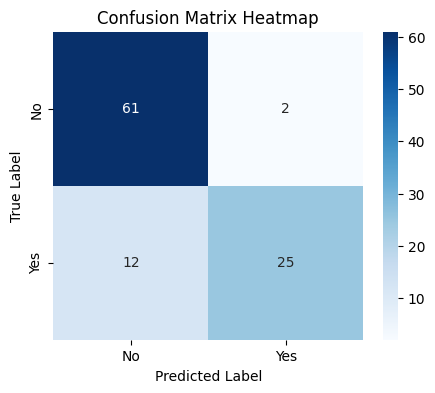

In [71]:
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])  #fmt : Formats the values as integers ('d' = decimal numbers)
 
# Labels, title, and display
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

## Step 9: Apply Cross-Validation on Logistic Regression

In [72]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='accuracy')

# Print the individual scores
print("Cross-validation scores for each fold:", cv_scores)

# Compute & print the average accuracy across all folds
print("\nMean Accuracy from Cross-Validation:", cv_scores.mean())

# Standard deviation of accuracy scores
print("\nStandard Deviation of Accuracy:", cv_scores.std())


Cross-validation scores for each fold: [0.83333333 0.85       0.8        0.78333333 0.81666667]

Mean Accuracy from Cross-Validation: 0.8166666666666667

Standard Deviation of Accuracy: 0.02357022603955158
